# **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Puntadewa - Dataset.csv')
print(df.to_string())

        Minggu                Produk  Jumlah Terjual  Harga Satuan (Rp)  Total Pendapatan (Rp)
0     Minggu 1           Air Mineral              72               4000               288000.0
1     Minggu 1                Burger              18               7000               126000.0
2     Minggu 1          Cappucino Es              39               6000               234000.0
3     Minggu 1      Cappucino Hangat               6               5000                30000.0
4     Minggu 1             Coklat Es              16               6000                96000.0
5     Minggu 1         Coklat Hangat               6               5000                30000.0
6     Minggu 1              Gorengan             188               2000               376000.0
7     Minggu 1           Jahe Hangat               5               5000                25000.0
8     Minggu 1              Jeruk Es              31               6000               186000.0
9     Minggu 1          Jeruk Hangat              

# **Data Preprocessing**

In [ ]:
product_summary = df.groupby("Produk").agg(
    total_sales=("Jumlah Terjual", "sum"),
    avg_price=("Harga Satuan (Rp)", "mean"),
    total_revenue=("Total Pendapatan (Rp)", "sum")
).reset_index()

# **Cluster the data using K Means Clustering**

In [ ]:
product_summary["revenue_per_sale"] = product_summary["total_revenue"] / product_summary["total_sales"]

scaler = StandardScaler()
features = product_summary[["total_sales", "avg_price", "revenue_per_sale"]]
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
product_summary["Cluster"] = kmeans.fit_predict(scaled_features)

print(product_summary)

                  Produk  total_sales  avg_price  total_revenue  \
0            Air Mineral          640     4000.0      2560000.0   
1                 Burger           70     7000.0       490000.0   
2           Cappucino Es          274     6000.0      1644000.0   
3       Cappucino Hangat           57     5000.0       285000.0   
4              Coklat Es          104     6000.0       624000.0   
5          Coklat Hangat           39     5000.0       195000.0   
6               Gorengan         1731     2000.0      3462000.0   
7                Jahe Es            7     6000.0        36000.0   
8            Jahe Hangat          189     5000.0       945000.0   
9               Jeruk Es          236     6000.0      1416000.0   
10          Jeruk Hangat          114     5000.0       570000.0   
11                Joshua          261     7000.0      1827000.0   
12              Jus Buah          144     7000.0      1008000.0   
13                 Kebab           66    10000.0       660000.

# **Plot the data**

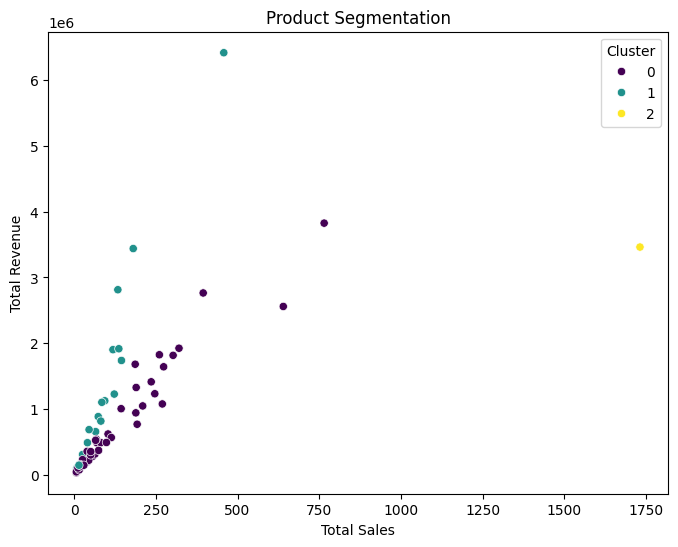

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=product_summary["total_sales"],
    y=product_summary["total_revenue"],
    hue=product_summary["Cluster"],
    palette="viridis"
)
plt.title("Product Segmentation")
plt.xlabel("Total Sales")
plt.ylabel("Total Revenue")
plt.legend(title="Cluster")
plt.show()